In [1]:
### modules
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm 
import cartopy.crs as ccrs
from glob import glob
import matplotlib.colors as colors
from cmocean import cm
import cartopy.feature as cfeature

In [ ]:
# to do:
# I excluded the chl criterium and just used annual
# mean SST, annual mean ice cover, max MLD. Maybe you could just exclude
# the phytoplankton criterium (since the biomes look quite ok)

# using the full range of years (until 2011 I think is available) for
# the ORION10.LP01-EXP05 experiment. I guess it's easier if you average
# SST and ileadfra over the whole period (--> compute a climatology)  with
# nco. --> OK

#  compare the resulting regions with the ones we used before (do you
# still have the netcdf file?) --> OK

# - plot the regions together with ssh contours (also
# climatologically-averaged). ssh is in the grid_T file and is called
# sossheig. --> WAITING FOR LAVINIA'S ANSWER

# - compare the region boundaries with the location of the Subantarctic
# front --> I will explain this when you are at this point

# - same computation with ORCA05 and ORCA025 --> I'll point you to the
# correct experiments when you are at this point. --> OK

In [2]:
# settings:

#input files path
# input_path = '/scratch/usr/shklvn09/SCRATCH/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5.LP01-EXP05/OUT/biomes/'

#save resulting biomes as netcdf
saving_directory  = '/scratch/usr/shkifmmp/biomes/' 

### Playing with the old script

In [175]:
# OLD SCRIPT

### modules
from netCDF4 import Dataset

path = '/scratch/usr/shklvn09/SCRATCH/ORION10.L46.LIM2vp.CFCSF6.MOPS.JRA.XIOS2.5.LP01-EXP05/OUT/biomes/'

#loading data
ff_ice = Dataset(glob(path + '*ileadfra.nc')[0])
ff_mld = Dataset(glob(path + '*MLD.nc')[0])
ff_sst = Dataset(glob(path + '*sst.nc')[0])

mld_old = ff_mld.variables['somxl010'][:,:,:]
ice_old = ff_ice.variables['ileadfra'][:,:,:]
sst_old = np.squeeze(ff_sst.variables['sosstsst'][:,:,:])

lat_old = ff_ice.variables['nav_lat'][:]
lon_old = ff_ice.variables['nav_lon'][:]

In [89]:
print(mld_old.shape) # months x lat x lon
print(ice_old.shape)
print(sst_old.shape)
print(lat_old.shape)
print(lon_old.shape)

(84, 511, 722)
(96, 511, 722)
(84, 511, 722)
(511, 722)
(511, 722)


In [115]:
## FUNCTIONS (OLD SCRIPT)

def annualmax(datam):
        """
        this function calculates the annual max for a 3d (t,y,x) variable.

        """
        import numpy as np
        nn = np.shape(datam)
        nt = nn[0]
        
        dimt = len(nn) #time dimension along which to average!
        if dimt ==3:
            nx = nn[2]
            ny = nn[1]
            var_annualmax = np.nan * np.zeros((int(np.floor(nt/12)), ny, nx))
            for t in range(0,int(np.floor(nt/12))):
                ind1 = t*12
                ind2 = ind1 + 12
                datamB = datam[ind1:ind2,:,:]
                var_annualmax[t,:,:] = np.nanmax(datamB, axis=0)
        else:
            raise ValueError('Input dimensions not suitable.')
        return var_annualmax
    
def annualmean(datam):
    """
    this function calculates the annual mean for a 3d (t,y,x) variable.

    """
    import numpy as np
    nn = np.shape(datam)
    nt = nn[0]

    dimt = len(nn) #time dimension along which to average!
    if dimt ==3:
        nx = nn[2]
        ny = nn[1]
        var_annualmean = np.nan * np.zeros((int(np.floor(nt/12)), ny, nx))
        for t in range(0,int(np.floor(nt/12))):
            ind1 = t*12
            ind2 = ind1 + 12
            #print ind2
            datamB = datam[ind1:ind2,:,:]
            var_annualmean[t,:,:] = np.nanmean(datamB, axis=0)
    else:
        raise ValueError('Input dimensions not suitable.')
    return var_annualmean
    
    
def djfm_mean(datam):
        """
        this function calculates the DJFM max for a 3d (t,y,x) variable. 
        Assumes that the months go from January-December, so DJFM corresponds
        to the indices [12,1,2,3]

        """
        import numpy as np
        nn = np.shape(datam)
        nt = nn[0]
        
        dimt = len(nn) #time dimension along which to average!
        if dimt ==3:
            nx = nn[2]
            ny = nn[1]
            var_djfm_mean = np.nan * np.zeros((int(np.floor(nt/12)), ny, nx))
            for t in range(0,int(np.floor(nt/12))):
                ind1 = t*12
                ind2 = t*12+1
                ind3 = t*12+2
                ind4 = ind1 + 11
                datamB = datam[[ind1,ind2,ind3,ind4],:,:]
                var_djfm_mean[t,:,:] = np.nanmax(datamB, axis=0)
                
        else:
            raise ValueError('Input dimensions not suitable.')
        return var_djfm_mean

In [181]:
MLD_max = annualmax(mld_old) # MLD: at each grid cell, get max MLD for each year
MLD_max_clim = np.mean(MLD_max,axis=0) # calculate climatological mean for all variables

sst_annual = annualmean(sst_old)
sst_annual_clim = np.mean(sst_annual,axis=0)

ice_annual = annualmax(ice_old)
ice_annual_clim = np.mean(ice_annual,axis=0)

In [172]:
MLD_max_clim.shape, sst_annual_clim.shape, ice_annual_clim.shape

((511, 722), (511, 722), (511, 722))

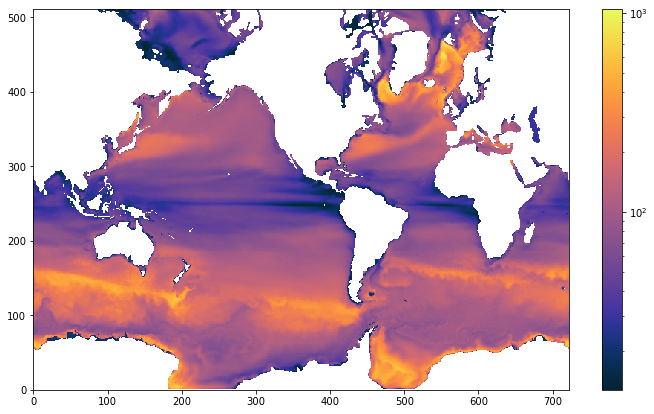

In [182]:
plt.figure(figsize = (12,7))
plt.pcolormesh(MLD_max_clim, norm = colors.LogNorm(), cmap = cm.thermal)
plt.colorbar()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

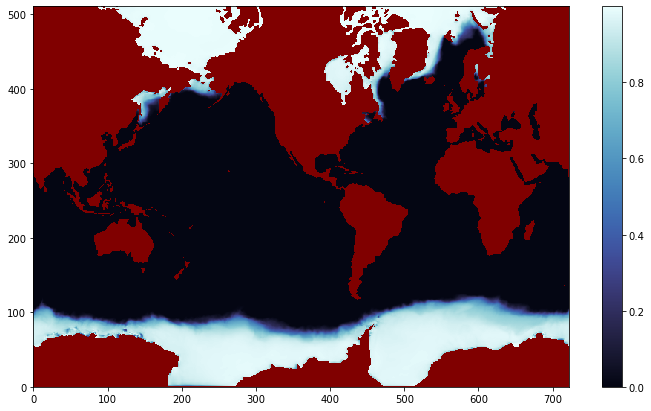

In [156]:
plt.figure(figsize = (12,7))
ax = plt.gca()
map1 = plt.pcolormesh(ice_annual_clim * mask_np, cmap = cm.ice)
plt.pcolormesh(mask.where(mask ==0), cmap = 'jet_r')
plt.colorbar(map1)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

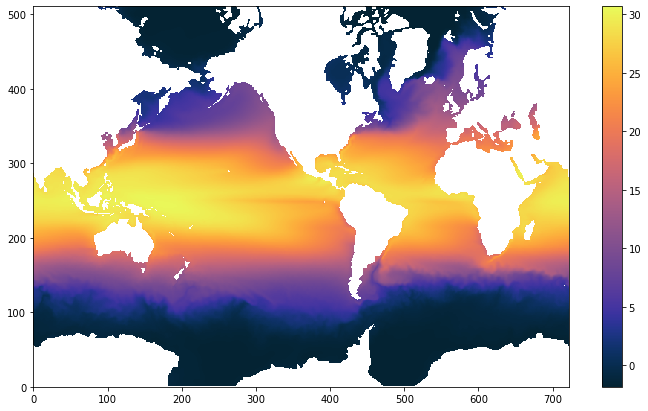

In [187]:
plt.figure(figsize = (12,7))
ax = plt.gca()
map1 = plt.pcolormesh(sst_annual_clim * mask_np, cmap = cm.thermal)
# plt.pcolormesh(mask.where(mask ==0), cmap = 'jet_r')
plt.colorbar(map1)
plt.plot

### New thing

In [133]:
# LOADING DATA --- NEW SCRIPT
mask = xr.open_dataset('/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/mesh_mask.nc').tmask.isel(z = 1).squeeze()
# mask = xr.open_dataset('/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/mesh_mask.nc')

sst = xr.open_dataset(glob(saving_directory + '*20071231_sst.nc')[0],
                     chunks = {'y': 100, 'x': 100}).sosstsst.squeeze()
mld = xr.open_dataset(glob(saving_directory + '*20071231_mld.nc')[0],
                     chunks = {'y': 100, 'x': 100}).somxl010
ice = xr.open_dataset(glob(saving_directory + '*20071231_ileadfra.nc')[0],
                     chunks = {'y': 100, 'x': 100}).ileadfra

In [ ]:
mld.max?

In [ ]:
mask

In [200]:
#only one timestep since we've done the climatological mean before
mld_max = mld.max(dim = 'time_counter')
ice_max = ice.max(dim = 'time_counter')

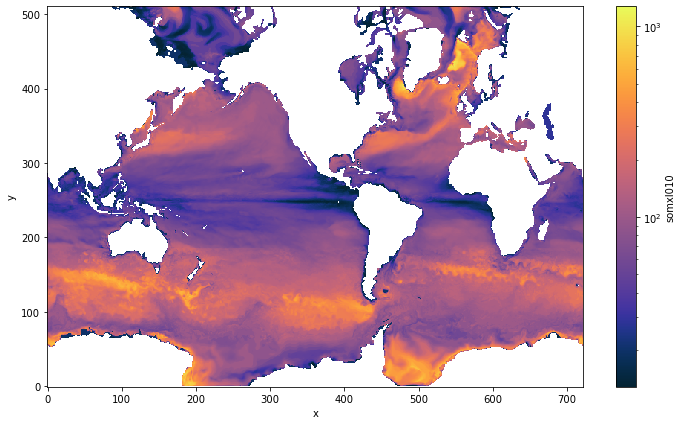

In [201]:
plt.figure(figsize = (12,7))
mld_max.where(mask).plot(norm = colors.LogNorm(), cmap = cm.thermal)

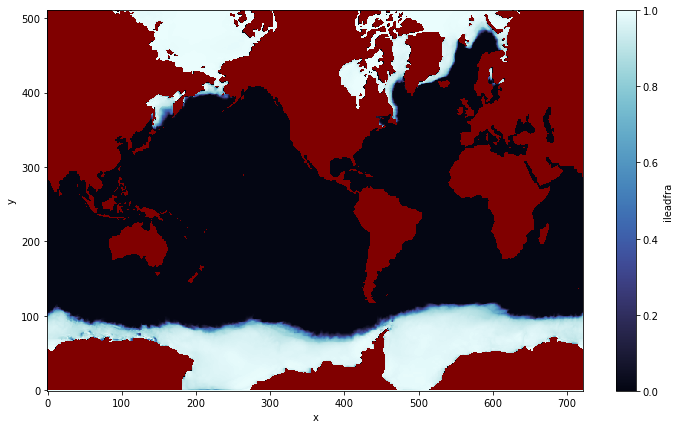

In [202]:
plt.figure(figsize = (12,7))
ice_max.plot(cmap = cm.ice)
plt.pcolormesh(mask.where(mask ==0), cmap = 'jet_r')

### Comparison between old and new

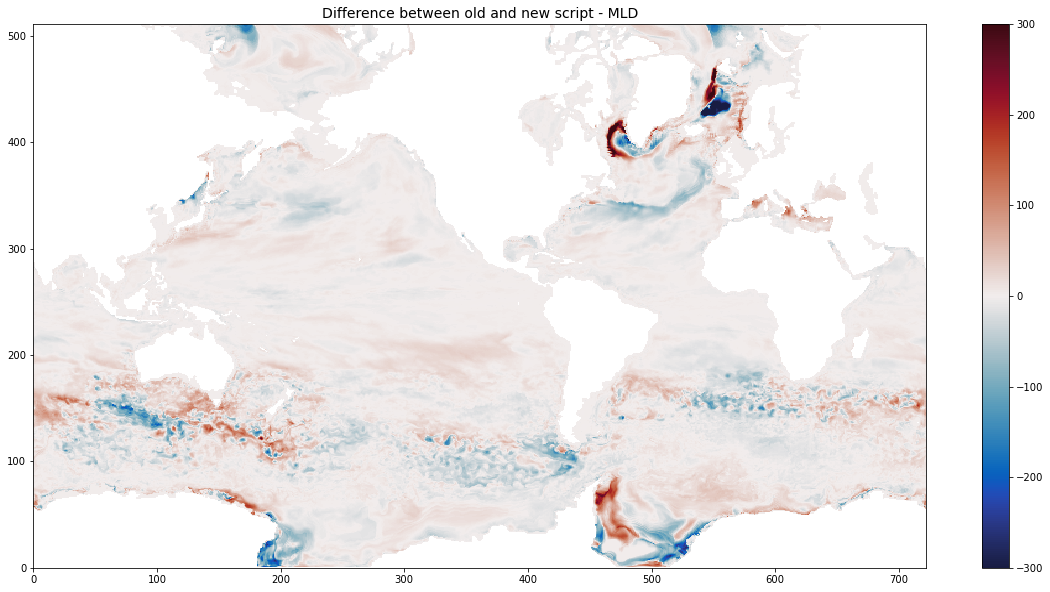

In [208]:
plt.figure(figsize = (20,10))
plt.pcolormesh((MLD_max_clim - mld_max.where(mask).values), cmap = cm.balance, norm = colors.TwoSlopeNorm(vcenter = 0, vmin = -300, vmax = 300))
plt.colorbar()
plt.title('Difference between old and new script - MLD', fontsize=14)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'biomes_mld_diff_old_new.png', format='png', facecolor="w")

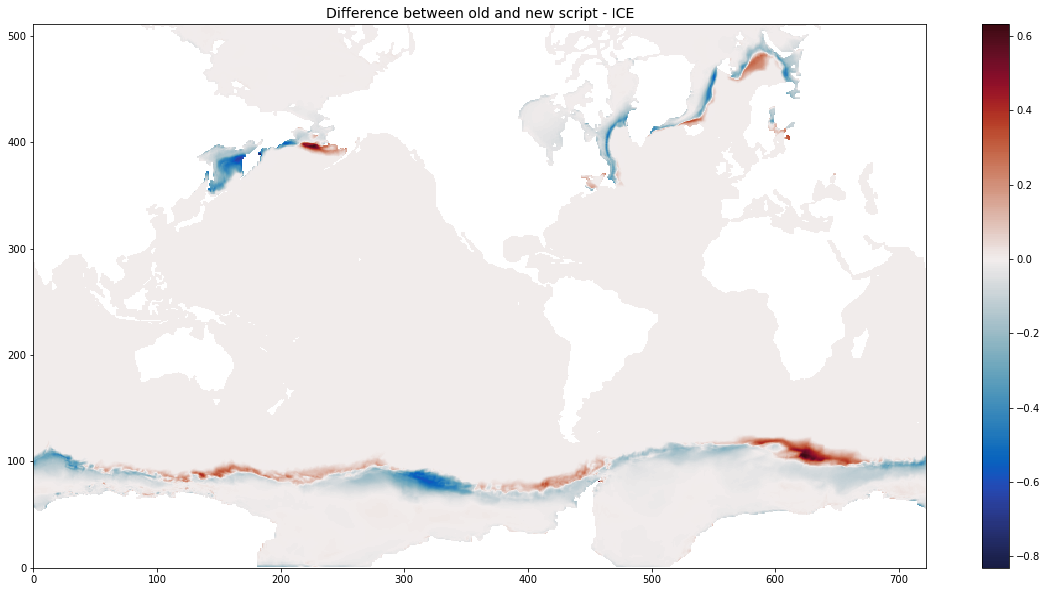

In [210]:
plt.figure(figsize = (20,10))
plt.pcolormesh((ice_annual_clim - ice_max.where(mask).values), cmap = cm.balance, norm = colors.TwoSlopeNorm(vcenter = 0))
plt.colorbar()
plt.title('Difference between old and new script - ICE', fontsize=14)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'biomes_ice_diff_old_new.png', format='png', facecolor="w")

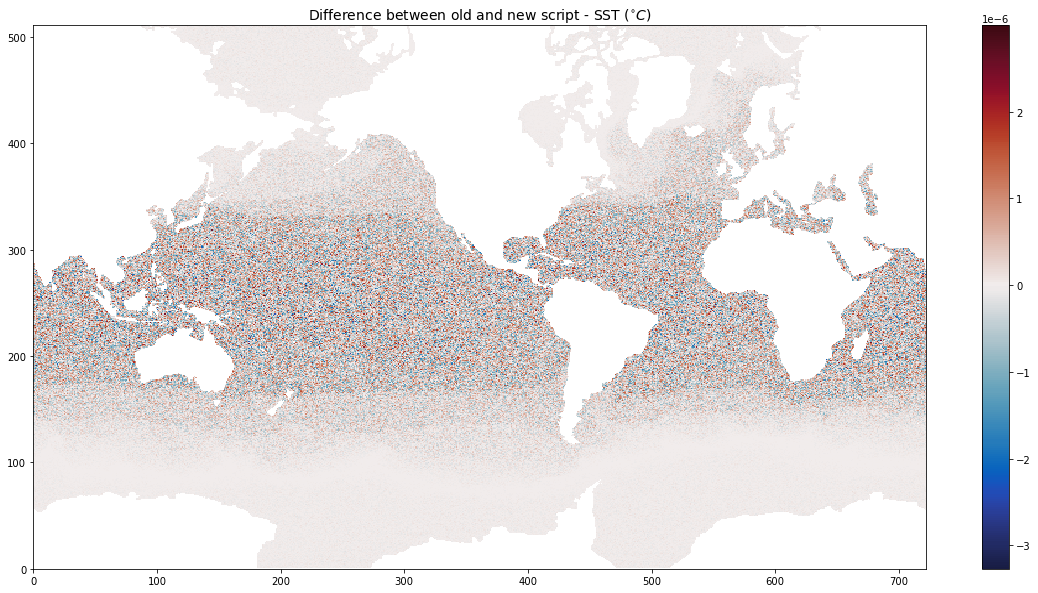

In [213]:
plt.figure(figsize = (20,10))
plt.pcolormesh((sst_annual_clim - sst.where(mask).values), cmap = cm.balance, norm = colors.TwoSlopeNorm(vcenter = 0))
plt.colorbar()
plt.title('Difference between old and new script - SST ($^{\circ}C$)', fontsize=14)

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'biomes_sst_diff_old_new.png', format='png', facecolor="w")

### POST-PROCESSING

In [3]:
# POST-PROCESSING
# We already have the sst annual mean for the whole period

mask = xr.open_dataset('/scratch/usr/shklvn09/NUDATA/ORION/10-data/meshmask/mesh_mask.nc').tmask.isel(z = 0).squeeze()

sst = xr.open_dataset(glob(saving_directory + '*20141231_sst.nc')[0],
                     chunks = {'y': 100, 'x': 100}).sosstsst.squeeze()
mld = xr.open_dataset(glob(saving_directory + '*20141231_mld.nc')[0],
                     chunks = {'y': 100, 'x': 100}).somxl010
ice = xr.open_dataset(glob(saving_directory + '*20141231_ileadfra.nc')[0],
                     chunks = {'y': 100, 'x': 100}).ileadfra

In [6]:
#only one timestep since we've done the climatological mean before
mld_max = mld.max(dim = 'time_counter')
ice_max = ice.max(dim = 'time_counter')

### Creating mask

In [129]:
# del subregions

In [136]:
subregions = xr.DataArray(mask, name = 'subregions_biome')
subregions.values = np.full((mask.shape),np.nan)

In [137]:
# ICE; condition ice_max > 0.5, then region == 1
subregions = subregions.where((ice_max > 0.5) == False, other = 1) 
# SPSS; condition ice_max <=0.5 and sst<8
subregions = subregions.where(((ice_max <= 0.5) & (sst < 8)) == False, other = 2) 
# STSS; condition mld_max > 150 and sst > 8
subregions = subregions.where(((mld_max > 150) & (sst > 8)) == False, other = 3)
# applying mask to the land
subregions = subregions.where(mask, other= np.nan)

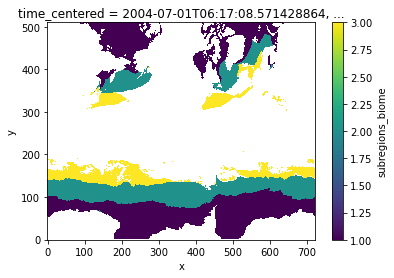

In [138]:
subregions.plot()

In [146]:
subregions.to_netcdf(path = saving_directory + 'subregions_biome.nc', mode = 'w')

In [142]:
# teste_op = xr.open_dataset('subregions_biome.nc')

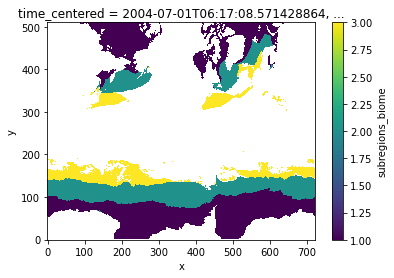

In [144]:
# teste_op.subregions_biome.plot()

## Comparing with reccap2ocean_regions.nc

In [5]:
reccap = xr.open_dataset('/scratch/usr/shkifmmp/reccap2/mask/reccap2ocean_regions.nc')
subregions = xr.open_dataset('/scratch/usr/shkifmmp/biomes/subregions_biome.nc').subregions_biome

In [7]:
reccap['southern'] = reccap.southern.where(reccap.southern != 1)
reccap['southern'] = reccap.southern.where(reccap.southern != -6)

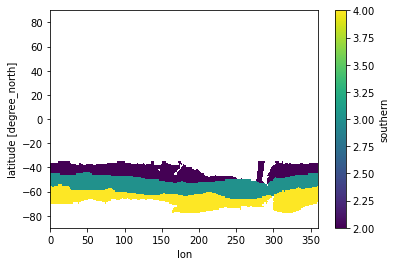

In [8]:
reccap.southern.plot()

In [4]:
reccap

<xarray.Dataset>
Dimensions:                (lat: 180, lon: 360)
Coordinates:
  * lat                    (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                    (lon) float64 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    reccap2_ocean_regions  (lat, lon) float64 ...
    atlantic               (lat, lon) float64 ...
    pacific                (lat, lon) float64 ...
    indian                 (lat, lon) float64 ...
    arctic                 (lat, lon) float64 ...
    southern               (lat, lon) float64 ...

### Get rid of discontinuity on lon grid

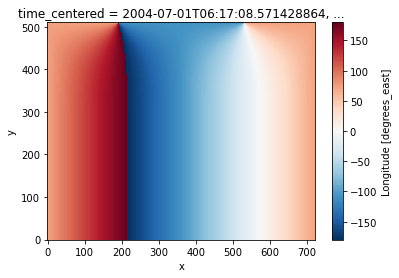

In [10]:
subregions.nav_lon.plot()

In [11]:
subregions.coords["x"] = range(len(subregions.x))
subregions.coords["y"] = range(len(subregions.y))

In [12]:
after_discont = ~(subregions.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

In [13]:
subregions.coords["nav_lon"] = (
    subregions.coords["nav_lon"]
    + 360 * after_discont
)

In [14]:
#crop redundant data
subregions = subregions.isel(x= slice(1,-1), y=slice(None, -1))

In [11]:
subregions

<xarray.DataArray 'subregions_biome' (y: 510, x: 720)>
[367200 values with dtype=float64]
Coordinates:
    nav_lat        (y, x) float32 -77.01 -77.01 -77.01 ... 50.18 50.07 50.0
    nav_lon        (y, x) float64 73.25 73.75 74.25 74.75 ... 433.0 433.0 433.0
    time_centered  datetime64[ns] 2004-07-01T06:17:08.571428864
    time_counter   datetime64[ns] 2004-07-01T06:17:08.571428864
  * x              (x) int64 1 2 3 4 5 6 7 8 ... 713 714 715 716 717 718 719 720
  * y              (y) int64 0 1 2 3 4 5 6 7 ... 502 503 504 505 506 507 508 509

In [ ]:
subregions.nav_lat.plot()

NameError: name 'subregions' is not defined

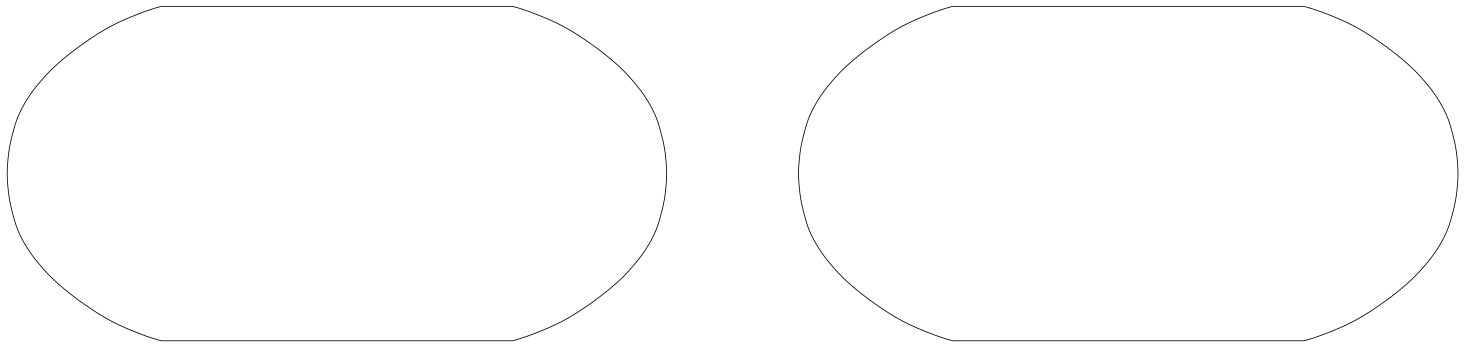

In [2]:
# plot

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(26,8), subplot_kw = {'projection': ccrs.Robinson(central_longitude = -100)}, facecolor="none")

cmap1 = plt.cm.get_cmap('viridis', 3) 
# cmap2 = plt.cm.get_cmap('viridis', 5) 

map1 = subregions.plot(x='nav_lon', y='nav_lat', transform= ccrs.PlateCarree(), ax=axs[0], zorder=0,
               add_colorbar=False, cmap = cmap1)
axs[0].add_feature(cfeature.LAND)

axs[0].set_title('ORION10 Subregions_Biomes', fontsize=20)

map2 = reccap.southern.plot(ax=axs[1], transform=ccrs.PlateCarree(), add_colorbar=False, cmap = cmap2)
axs[1].set_title('Reccap2_ocean_regions', fontsize=20)
axs[1].add_feature(cfeature.LAND)

c = [plt.colorbar(m, pad=0.02, shrink=0.2, ax=ax) for ax, m in zip(axs, [map1, map2])]

c[0].set_ticks([1, 2, 3])
c[0].set_ticklabels(['ICE', 'SPSS', 'STSS'])

# c[1].set_ticks([1, 2, 3, 4, 5])
# c[1].set_ticklabels(['Atlantic', 'Pacific', 'Indian', 'Artic', 'Southern'])
# [i.ax.tick_params(labelsize=16) for i in c]

plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
# plt.savefig(savepath + 'ORION10_subregions_biomes_reccap2_maps.png', format='png', facecolor="w")# dpi=150)

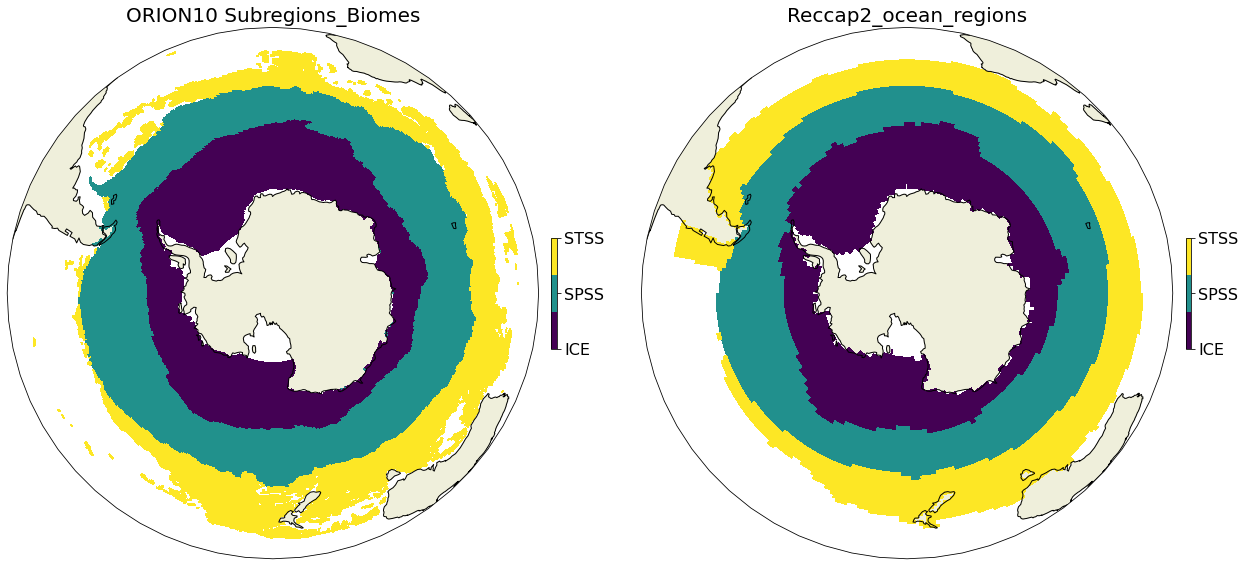

In [46]:
# plot
# ccrs.NearsidePerspective(central_latitude=-90, satellite_height=36000000)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,8), 
                        subplot_kw = {'projection': ccrs.NearsidePerspective(central_latitude=-90)}, facecolor="none")

cmap1 = plt.cm.get_cmap('viridis', 3) 
cmap2 = plt.cm.get_cmap('viridis_r', 3) 


map1 = subregions.plot(x='nav_lon', y='nav_lat', transform= ccrs.PlateCarree(), ax=axs[0], zorder=0,
               add_colorbar=False, cmap = cmap1)
axs[0].add_feature(cfeature.LAND)
axs[0].coastlines()

axs[0].set_title('ORION10 Subregions_Biomes', fontsize=20)

map2 = reccap.southern.where(reccap.southern >-1).plot(ax=axs[1], transform=ccrs.PlateCarree(), add_colorbar=False, cmap = cmap2)
axs[1].set_title('Reccap2_ocean_regions', fontsize=20)
axs[1].add_feature(cfeature.LAND)
axs[1].coastlines()

c = [plt.colorbar(m, pad=0.02, shrink=0.2, ax=ax) for ax, m in zip(axs, [map1, map2])]

c[0].set_ticks([1, 2, 3])
c[0].set_ticklabels(['ICE', 'SPSS', 'STSS'])

c[1].set_ticks([4, 3, 2])
c[1].set_ticklabels(['ICE', 'SPSS', 'STSS'])
[i.ax.tick_params(labelsize=16) for i in c]
c[1].ax.invert_yaxis()

plt.tight_layout()

# savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
# plt.savefig(savepath + 'ORION10_subregions_biomes_reccap2_southern_maps.png', format='png', facecolor="w")# dpi=150)

In [42]:
ccrs.NearsidePerspective?

Init signature:
ccrs.NearsidePerspective(
    central_longitude=0.0,
    central_latitude=0.0,
    satellite_height=35785831,
    false_easting=0,
    false_northing=0,
    globe=None,
)
Docstring:     
Perspective view looking directly down from above a point on the globe.

In this projection, the projected coordinates are x and y measured from
the origin of a plane tangent to the Earth directly below the perspective
point (e.g. a satellite).
Init docstring:
Parameters
----------
central_longitude: float, optional
    The central longitude. Defaults to 0.
central_latitude: float, optional
    The central latitude. Defaults to 0.
satellite_height: float, optional
    The height of the satellite. Defaults to 35785831 meters
    (true geostationary orbit).
false_easting:
    X offset from planar origin in metres. Defaults to 0.
false_northing:
    Y offset from planar origin in metres. Defaults to 0.
globe: :class:`cartopy.crs.Globe`, optional
    If omitted, a default globe is created.


### SAME FOR ORCA05

In [10]:
ORCA05_directory = "/scratch/usr/shkifmmp/biomes/ORCA05/"

mask_05 = xr.open_dataset('/scratch/usr/shklvn09/NUDATA/ORCA/05-data/meshmask/mesh_mask.nc').tmask.isel(z = 0).squeeze()

sst_05 = xr.open_dataset(glob(ORCA05_directory + '*20181231_sst.nc')[0],
                     chunks = {'y': 100, 'x': 100}).sosstsst.squeeze()
mld_05 = xr.open_dataset(glob(ORCA05_directory + '*20181231_mld.nc')[0],
                     chunks = {'y': 100, 'x': 100}).somxl010
ice_05 = xr.open_dataset(glob(ORCA05_directory + '*20181231_ileadfra.nc')[0],
                     chunks = {'y': 100, 'x': 100}).ileadfra

In [11]:
subregions_05 = xr.DataArray(mask_05, name = 'subregions_biome')
subregions_05.values = np.full((mask_05.shape),np.nan)

In [13]:
#only one timestep since we've done the climatological mean before
mld_max = mld_05.max(dim = 'time_counter')
ice_max = ice_05.max(dim = 'time_counter')

In [15]:
# ICE; condition ice_max > 0.5, then region == 1
subregions_05 = subregions_05.where((ice_max > 0.5) == False, other = 1) 
# SPSS; condition ice_max <=0.5 and sst<8
subregions_05 = subregions_05.where(((ice_max <= 0.5) & (sst_05 < 8)) == False, other = 2) 
# STSS; condition mld_max > 150 and sst > 8
subregions_05 = subregions_05.where(((mld_max > 150) & (sst_05 > 8)) == False, other = 3)
# applying mask to the land
subregions_05 = subregions_05.where(mask_05, other= np.nan)

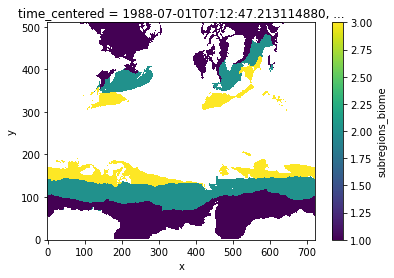

In [17]:
subregions_05.plot()

In [19]:
subregions_05.to_netcdf(path = ORCA05_directory + 'subregions_biomes.nc', mode = 'w')

### ORCA025

In [21]:
ORCA025_directory = "/scratch/usr/shkifmmp/biomes/ORCA025/"

mask_025 = xr.open_dataset('/scratch/usr/shklvn09/NUDATA/ORCA/025-data/meshmask/mesh_mask.nc').tmask.isel(z = 0).squeeze()

sst_025 = xr.open_dataset(glob(ORCA025_directory + '*20181231_sst.nc')[0],
                     chunks = {'y': 100, 'x': 100}).sosstsst.squeeze()
mld_025 = xr.open_dataset(glob(ORCA025_directory + '*20181231_mld.nc')[0],
                     chunks = {'y': 100, 'x': 100}).somxl010
ice_025 = xr.open_dataset(glob(ORCA025_directory + '*20181231_ileadfra.nc')[0],
                     chunks = {'y': 100, 'x': 100}).ileadfra

In [22]:
subregions_025 = xr.DataArray(mask_025, name = 'subregions_biomes')
subregions_025.values = np.full((mask_025.shape),np.nan)

In [23]:
#only one timestep since we've done the climatological mean before
mld_max = mld_025.max(dim = 'time_counter')
ice_max = ice_025.max(dim = 'time_counter')

In [24]:
# ICE; condition ice_max > 0.5, then region == 1
subregions_025 = subregions_025.where((ice_max > 0.5) == False, other = 1) 
# SPSS; condition ice_max <=0.5 and sst<8
subregions_025 = subregions_025.where(((ice_max <= 0.5) & (sst_025 < 8)) == False, other = 2) 
# STSS; condition mld_max > 150 and sst > 8
subregions_025 = subregions_025.where(((mld_max > 150) & (sst_025 > 8)) == False, other = 3)
# applying mask to the land
subregions_025 = subregions_025.where(mask_025, other= np.nan)

In [26]:
subregions_025

<xarray.DataArray 'subregions_biomes' (y: 1021, x: 1442)>
dask.array<where, shape=(1021, 1442), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 -77.01 -77.01 -77.01 ... 50.02 50.0 50.0
    nav_lon        (y, x) float32 72.75 73.0 73.25 73.5 ... 73.01 73.0 73.0
    time_centered  datetime64[ns] dask.array<chunksize=(), meta=np.ndarray>
    time_counter   datetime64[ns] 1988-07-01T07:12:47.213114880
Dimensions without coordinates: y, x

In [27]:
subregions_025.to_netcdf(path = ORCA025_directory + 'subregions_biomes.nc', mode = 'w')